# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

Each mobile plan nowdays contains 3 major components: calls, messages and Internet traffic. Customers behavior can differ regarding each of this components. The structure of the mobile plan can either mostly suit the needs of the customer which leads to purchasing less additional options by the customer every month or vice versa stimulate user to buy additional services and brining telecome operator more revenue.  
  
In this project we got data about these 3 components in the different tables, as well as users' and mobile plans information in two additinal datasets.    

In order to perform correct analysis and answer the main questions of the project about correspondance of revenue from each plan and correspondance of revenue from users of different regions we will need to explore the raw data, fix all problems with data (if any) and merge all dataframes together on the certain conditions.   
  
The distribution and outliers need to be checked and treated before performing calculation and statictcal analyses as long as they deal with mean values. 
  
After we get the clean data the calculations, visualization of results and a series of statistical tests have to be performed.


## Initialization

First of all we need to import all libraries we supposed to use during this project.

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import warnings
warnings.filterwarnings('ignore')

## Load data

Now we load all data for our project which contain of 5 files: for calls, messages, internet traffic, plans and users.

In [2]:
# Loading the data files into different DataFrames
data_calls = pd.read_csv('/datasets/megaline_calls.csv')
data_web = pd.read_csv('/datasets/megaline_internet.csv')
data_sms = pd.read_csv('/datasets/megaline_messages.csv')
data_plans = pd.read_csv('/datasets/megaline_plans.csv')
data_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

The data for this project is split into several tables. We have to explore each one to get an initial understanding of the data.

### Calls table

In [3]:
# Checking general information of the dataframe and printing sample 
print(data_calls.info())
print(data_calls.describe())
display(data_calls.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


We have 137735 entries in 4 columns with no missing values. All columns' names are spelled correctly. We have to check for impossible values, errors and duplications. There are calls with 0 duration, which should be also checked. `call_date` column has text type and should be converted into datatime format.

### Internet traffic table

In [4]:
# Checking general information of the dataframe and printing sample 
print(data_web.info())
print(data_web.describe())
display(data_web.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


We have 104825 entries in 4 columns with no missing values. All columns' names are spelled correctly. We have to check for impossible values, errors and duplications. `session_date` column has text type and should be converted into datatime format.

### Messages table

In [5]:
# Checking general information of the dataframe and printing sample 
print(data_sms.info())
print(data_sms.describe())
display(data_sms.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


We have 76051 entries in 3 columns with no missing values. All columns' names are spelled correctly. We have to check for impossible values, errors and duplications. `message_date` column has text type and should be converted into datatime format.

### Users table

In [6]:
# Checking general information of the dataframe and printing sample 
print(data_users.info())
print(data_users.describe())
display(data_users.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


We have 500 entries in 8 columns. All columns' names are spelled correctly. We have missing values in just one column `churn_date`, which are equal to 0 value according to Description of data (the plan is active at the moment of generating of the dataset). We have to check for impossible values, errors and duplications.

### Plans table

In [7]:
# Checking general information of the dataframe and printing sample 
print(data_plans.info())
print(data_plans.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000        

In [8]:
# Checking general information of the dataframe and printing sample 
print(data_plans.info())
display(data_plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


We have 2 entries in 8 columns with no missing values. All columns' names are spelled correctly. We have to check for impossible values, errors and duplications.

The data in all 5 dataframes have no missing values and have right type format for their values. The columns `call_date`, `message_date` and `session_date` are the only columns for which is neccesary to change format from text to datetime in order to make calculations.  

## Users table - fixing and enriching data

### Fixing Data

We will fill missing values in `churn_date` column with 0 values.

In [9]:
# Filling missing values with 0.
data_users = data_users.fillna(0)

# Checking that everything is correct
print(data_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [10]:
# Checking for duplicates
print(f'Number of duplicated rows: ', data_users.duplicated().sum())

Number of duplicated rows:  0


We have no duplicated rows in `data_users` dataframe.

### Enriching data

For cheking hypothesis regarding customers from NY-NJ areas we need to add a column with an appropriate values (1 - for NY-NJ customers and 0 - for all other customers). 

In [11]:
# Checking for unique values in the `city` column
city_list = data_users['city'].unique().tolist()
city_list.sort()
print(city_list)

['Albany-Schenectady-Troy, NY MSA', 'Albuquerque, NM MSA', 'Atlanta-Sandy Springs-Roswell, GA MSA', 'Austin-Round Rock-Georgetown, TX MSA', 'Bakersfield, CA MSA', 'Baltimore-Columbia-Towson, MD MSA', 'Baton Rouge, LA MSA', 'Birmingham-Hoover, AL MSA', 'Boston-Cambridge-Newton, MA-NH MSA', 'Bridgeport-Stamford-Norwalk, CT MSA', 'Buffalo-Cheektowaga, NY MSA', 'Cape Coral-Fort Myers, FL MSA', 'Charleston-North Charleston, SC MSA', 'Charlotte-Concord-Gastonia, NC-SC MSA', 'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Cincinnati, OH-KY-IN MSA', 'Cleveland-Elyria, OH MSA', 'Colorado Springs, CO MSA', 'Columbia, SC MSA', 'Columbus, OH MSA', 'Dallas-Fort Worth-Arlington, TX MSA', 'Dayton-Kettering, OH MSA', 'Denver-Aurora-Lakewood, CO MSA', 'Detroit-Warren-Dearborn, MI MSA', 'El Paso, TX MSA', 'Fresno, CA MSA', 'Grand Rapids-Kentwood, MI MSA', 'Greensboro-High Point, NC MSA', 'Houston-The Woodlands-Sugar Land, TX MSA', 'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA', 'Kansas City, 

We have no duplicate names in the different spelling and all entries have non-informative "MSA" text. 

In [12]:
# Splitting the city name into city and state and creating the state `column`
data_users[['city', 'state']] = data_users['city'].str.split(',', expand=True)

# Dropping the "MSA" in the state values
data_users['state'] = data_users['state'].str[:-4]

# Checking that everything is correct
display(data_users.tail(25))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
475,1475,Arlen,Sutton,66,Dallas-Fort Worth-Arlington,2018-05-28,ultimate,0,TX
476,1476,Tammara,Dorsey,24,Los Angeles-Long Beach-Anaheim,2018-06-10,ultimate,0,CA
477,1477,Magaly,Rivas,52,Riverside-San Bernardino-Ontario,2018-08-24,ultimate,0,CA
478,1478,Elane,David,51,Portland-Vancouver-Hillsboro,2018-06-28,ultimate,0,OR-WA
479,1479,Keesha,Burnett,44,Riverside-San Bernardino-Ontario,2018-11-12,surf,0,CA
480,1480,Jasper,Buchanan,46,St. Louis,2018-12-13,surf,0,MO-IL
481,1481,Roni,Frye,32,Urban Honolulu,2018-12-27,surf,0,HI
482,1482,Armand,Glenn,70,New York-Newark-Jersey City,2018-01-01,ultimate,0,NY-NJ-PA
483,1483,Miguel,Farrell,35,Chicago-Naperville-Elgin,2018-04-25,surf,0,IL-IN-WI
484,1484,Delpha,Baldwin,46,Dallas-Fort Worth-Arlington,2018-11-29,surf,0,TX


For future analysis we will need to group customers from NY-NJ area. We will create `two_states` column to filter such customers. 

In [13]:
# Dedining function to filter customers from NY and NJ
def two_states(data_users):
    if 'NY' in data_users['state'] or 'NJ' in data_users['state']:
        return 1
    else:
        return 0

# Checking if it works  
display(two_states(data_users.loc[482]))    
display(two_states(data_users.loc[481]))    

# Creating new column for filtering NY-NJ customer
data_users['two_states'] = data_users.apply(two_states, axis=1)

# Checking that everything iscorrect
print(data_users.info())
display(data_users.tail(15))    

1

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
 8   state       500 non-null    object
 9   two_states  500 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 39.2+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,two_states
485,1485,Damion,Woodard,67,Nashville-Davidson–Murfreesboro–Franklin,2018-08-21,surf,0,TN,0
486,1486,Sang,Solis,29,Orlando-Kissimmee-Sanford,2018-12-05,surf,0,FL,0
487,1487,Elton,Simpson,18,Cape Coral-Fort Myers,2018-08-16,ultimate,0,FL,0
488,1488,Shirley,Jones,29,Baton Rouge,2018-05-15,surf,0,LA,0
489,1489,Londa,Jenkins,72,Detroit-Warren-Dearborn,2018-05-24,surf,0,MI,0
490,1490,Shane,Cortez,42,Sacramento–Roseville–Folsom,2018-01-20,ultimate,0,CA,0
491,1491,Terina,Jensen,22,Grand Rapids-Kentwood,2018-04-27,surf,2018-09-18,MI,0
492,1492,Elvie,Jones,63,Portland-Vancouver-Hillsboro,2018-03-07,surf,0,OR-WA,0
493,1493,Cicely,Wynn,18,Boston-Cambridge-Newton,2018-03-06,ultimate,0,MA-NH,0
494,1494,Preston,Downs,70,New York-Newark-Jersey City,2018-04-19,surf,0,NY-NJ-PA,1


`data_user` dataframe contains clean data and is ready for further analysis.

## Calls table - fixing and enriching data

In [14]:
# Printing the general/summary information about the 'calls' DataFrame
print(data_calls.info())
print(data_calls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


### Fixing data

We need to check all entries with 0 duration.

In [15]:
# Checking for calls with 0 duration
print(f'Amount of calls with 0 duration: ', len(data_calls.query('duration == 0')))
print(f'Percentage of calls with 0 duration in the whole dataframe: '
      f'{len(data_calls.query("duration == 0"))/len(data_calls):.2%}')

Amount of calls with 0 duration:  26834
Percentage of calls with 0 duration in the whole dataframe: 19.48%


In [16]:
# Checking the distribution of 0 duration calls
display(data_calls.query('duration == 0').head(15))
display(data_calls.query('duration == 0').tail(15))
print()
print(f'Number of users with 0 values in duration: ', len(data_calls.query('duration == 0')['user_id'].unique()))
print()
print(data_calls.query('duration == 0')['user_id'].unique())

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
39,1001_43,1001,2018-12-13,0.0
44,1001_52,1001,2018-11-23,0.0
45,1001_53,1001,2018-10-24,0.0
49,1001_60,1001,2018-12-16,0.0
61,1001_84,1001,2018-10-07,0.0


,id,user_id,call_date,duration
137636,1499_105,1499,2018-09-18,0.0
137659,1499_128,1499,2018-09-07,0.0
137661,1499_130,1499,2018-12-18,0.0
137679,1499_148,1499,2018-12-04,0.0
137690,1499_159,1499,2018-11-04,0.0
137694,1499_163,1499,2018-09-24,0.0
137695,1499_164,1499,2018-10-26,0.0
137697,1499_166,1499,2018-10-15,0.0
137698,1499_167,1499,2018-10-13,0.0
137704,1499_173,1499,2018-10-10,0.0



Number of users with 0 values in duration:  478

[1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014
 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1026 1027 1028 1029
 1030 1031 1032 1033 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044
 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058
 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072
 1073 1074 1075 1076 1077 1078 1079 1081 1082 1083 1084 1085 1086 1087
 1088 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1102
 1103 1104 1105 1106 1107 1109 1110 1111 1112 1113 1114 1115 1116 1117
 1118 1119 1120 1122 1123 1124 1125 1126 1127 1128 1130 1132 1133 1134
 1135 1136 1138 1139 1140 1141 1142 1144 1145 1146 1147 1148 1149 1150
 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164
 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178
 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192
 1193 1195 1196 1197 1198 1

0 `duration` entries are distributed among the whole dataset and should be treated as non-tariffed entries (failed calls).

In [17]:
# Checking for duplicates
print(f'Number of duplicated rows: ', data_calls.duplicated().sum())

Number of duplicated rows:  0


We have no duplicated rows in `data_calls` dataframe.

### Enriching data

According to Description of plans we have to round up each `duration` entry up to the next integer value.

In [18]:
# Additng column with duration rounded up 
data_calls ['duration_round'] = data_calls['duration'].apply(np.ceil)

# Changing data type
data_calls ['duration_round'] = data_calls ['duration_round'].astype(int)

# Checking that everything is correct
display(data_calls.head())

,id,user_id,call_date,duration,duration_round
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5


For calculating monhthly revenue we need to create new `month` column with integer dtype.

In [19]:
# Addding month column
data_calls['month'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

# Checking years in the column
print(f'Years in the dataframe: ', pd.DatetimeIndex(data_calls['month']).year.unique())

# Replacing data in the month column
data_calls['month'] = pd.DatetimeIndex(data_calls['month']).month
print()

# Checking that everything is correct
display(data_calls.tail(10))
print(data_calls.info())

Years in the dataframe:  Int64Index([2018], dtype='int64', name='month')



,id,user_id,call_date,duration,duration_round,month
137725,1499_194,1499,2018-10-31,0.00,0,10
137726,1499_195,1499,2018-09-16,1.39,2,9
137727,1499_196,1499,2018-11-22,0.27,1,11
137728,1499_197,1499,2018-12-27,8.36,9,12
137729,1499_198,1499,2018-10-26,6.41,7,10
137730,1499_199,1499,2018-11-21,8.72,9,11
137731,1499_200,1499,2018-10-20,10.89,11,10
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,1,10
137734,1499_203,1499,2018-12-29,13.86,14,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              137735 non-null  object 
 1   user_id         137735 non-null  int64  
 2   call_date       137735 non-null  object 
 3   duration        137735 non-null  float64
 4   duration_round  137735 non-null  int64  
 5   month           137735 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 6.3+ MB
None


`data_calls` dataframe contains clean data and is ready for further analysis.

## Messages table - fixing and enriching data

In [20]:
# Printing the general/summary information about the messages' DataFrame
print(data_sms.info())
print(data_sms.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [21]:
# Print a sample of data for messages
display(data_sms.head(10))

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


### Fixing data

In [22]:
# Checking for duplicates
print(f'Number of duplicated rows: ', data_sms.duplicated().sum())

Number of duplicated rows:  0


The data in `data_sms` looks fine, we will change `message_date` column' values into datatime format in the next step.

### Enriching data

For calculating monhthly revenue we need to create new `month` column with integer dtype.

In [23]:
# # Addding month column
data_sms['month'] = pd.to_datetime(data_sms['message_date'], format='%Y-%m-%d')

# Checking years in the column
print(f'Years in the dataframe: ', pd.DatetimeIndex(data_sms['month']).year.unique())

# Replacing data in the month column
data_sms['month'] = pd.DatetimeIndex(data_sms['month']).month
print()

# Checking that everything is correct
display(data_sms.head(10))
print(data_sms.info())

Years in the dataframe:  Int64Index([2018], dtype='int64', name='month')



,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
 3   month         76051 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
None


`data_sms` dataframe contains clean data and is ready for further analysis.

## Internet traffic table - fixing and enriching data

In [24]:
# Print the general/summary information about the internet DataFrame
print(data_web.info())
print(data_web.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


In [25]:
# Print a sample of data for the internet traffic
display(data_web.head(10))

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


### Fix data

All data in the dataframe looks fine, we have to check entries with 0 `mb_used` values. We will change `session_date` column' values into datatime format in the next step.

In [26]:
# Checking for connections with 0 duration
print(f'Amount of sessions with 0 mb: ', len(data_web.query('mb_used == 0')))
print(f'Percentage of sessions with 0 mb in the whole dataframe: '
      f'{len(data_web.query("mb_used == 0"))/len(data_calls):.2%}')

Amount of sessions with 0 mb:  13747
Percentage of sessions with 0 mb in the whole dataframe: 9.98%


In [27]:
print(f'Number of users with 0 values in duration: {len(data_web.query("mb_used == 0")["user_id"].unique())}')
print()
print(data_web.query('mb_used == 0')['user_id'].unique())

Number of users with 0 values in duration: 477

[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1026 1027 1028
 1029 1030 1031 1032 1033 1035 1036 1037 1038 1039 1040 1041 1042 1043
 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057
 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071
 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085
 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099
 1100 1101 1102 1103 1104 1105 1106 1107 1109 1110 1111 1112 1113 1114
 1115 1116 1117 1118 1120 1121 1122 1123 1124 1125 1126 1127 1128 1130
 1131 1132 1133 1134 1136 1137 1138 1139 1140 1141 1142 1144 1145 1146
 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160
 1161 1162 1163 1164 1165 1166 1167 1168 1170 1171 1172 1173 1174 1175
 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189
 1190 1191 1192 1193 1194 119

0 `mb_used` entries are distributed among the whole dataset and should be treated as non-tariffed entries (session without data sent/received).

In [28]:
# Checking for duplicates
print(f'Number of duplicated rows: {data_web.duplicated().sum()}')

Number of duplicated rows: 0


We have no duplicated rows in `data_web` dataframe.

### Enrich data

We need to convert `session data` values to datetime format and to create a new `web_month` column for calculating monthly revenue.

In [29]:
## Addding month column
data_web['month'] = pd.to_datetime(data_web['session_date'], format='%Y-%m-%d')

# Checking for the years in the dataframe 
print(f'Years in the dataframe: ', pd.DatetimeIndex(data_web['month']).year.unique())

# Extracting month from date
data_web['month'] = pd.DatetimeIndex(data_web['month']).month

# Checking that everything is correct

display(data_web.tail(10))
print(data_web.info())

Years in the dataframe:  Int64Index([2018], dtype='int64', name='month')


,id,user_id,session_date,mb_used,month
104815,1499_210,1499,2018-11-30,191.92,11
104816,1499_211,1499,2018-09-26,0.00,9
104817,1499_212,1499,2018-09-11,0.00,9
104818,1499_213,1499,2018-10-15,430.27,10
104819,1499_214,1499,2018-10-18,261.13,10
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12
104824,1499_219,1499,2018-12-24,758.31,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
 4   month         104825 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


`data_web` dataframe contains clean data and is ready for further analysis.

## Studying plan conditions

In [30]:
# Printing out the plan conditions 
display(data_plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


According to the description of the plans we have to devide values in `mb_per_month_uncluded` by 1000 to convert Mb to Gb. 

## Aggregate data per user

Now, as the data is clean, we can aggregate data per user per period in order to have just one record per user per period.

In [31]:
# Calculating the number of calls made by each user per month. 
calls_monthly = data_calls.groupby(['user_id', 'month'], as_index = False)['id'].count()
display(calls_monthly)

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [32]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_monthly = data_calls.groupby(['user_id', 'month'], as_index = False)['duration_round'].sum()
display(minutes_monthly)

,user_id,month,duration_round
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [33]:
# Calculating the number of messages sent by each user per month.
sms_monthly = data_sms.groupby(['user_id','month'], as_index = False)['id'].count()
display(sms_monthly)

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [34]:
# Calculate the volume of internet traffic used by each user per month. 
web_monthly = data_web.groupby(['user_id','month'], as_index = False)['mb_used'].sum()
display(web_monthly)

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Now we can put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [35]:
# Merging the data for calls, minutes, messages, internet based on user_id and month
data_merged = minutes_monthly.merge(sms_monthly, left_on = ['user_id', 'month'], right_on = ['user_id', 'month'], how='outer')
data_merged = data_merged.merge(web_monthly, left_on = ['user_id', 'month'], right_on = ['user_id', 'month'], how='outer')

# Checking that everything is correct

print(data_merged.info())
display(data_merged.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int64  
 2   duration_round  2258 non-null   float64
 3   id              1806 non-null   float64
 4   mb_used         2277 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 107.5 KB
None


,user_id,month,duration_round,id,mb_used
0,1000,12,124.0,11.0,1901.47
1,1001,8,182.0,30.0,6919.15
2,1001,9,315.0,44.0,13314.82
3,1001,10,393.0,53.0,22330.49
4,1001,11,426.0,36.0,18504.30
5,1001,12,412.0,44.0,19369.18
6,1002,10,59.0,15.0,6552.01
7,1002,11,386.0,32.0,19345.08
8,1002,12,384.0,41.0,14396.24
9,1003,12,1104.0,50.0,27044.14


In [36]:
# Adding the users and plan information
data_merged = data_merged.merge(data_users, left_on = ['user_id'], right_on = ['user_id'], how='outer')

# Renaming columns 
data_merged.rename(columns = {'duration_round' : 'minutes', 'id' : 'sms', 'mb_used' : 'web'}, inplace = True)

# Filling missing values
data_merged.fillna(0, inplace=True)
data_merged['web'] = data_merged['web']/1000 # Converting Mb to Gb
data_merged = data_merged.query('month != 0') # Dropping rows with 0 in months, minutes, sms and web
data_merged['month'] = data_merged['month'].astype(int) # Converting month type into integer
data_merged['sms'] = data_merged['sms'].astype(int) # Converting sms type into integer
data_merged['minutes'] = data_merged['minutes'].astype(int) # Converting minutes type into integer

# Checking that everything is correct
display(data_merged.head(10))
print(data_merged.info())

,user_id,month,minutes,sms,web,first_name,last_name,age,city,reg_date,plan,churn_date,state,two_states
0,1000,12,124,11,1.90147,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,0,GA,0
1,1001,8,182,30,6.91915,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0
2,1001,9,315,44,13.31482,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0
3,1001,10,393,53,22.33049,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0
4,1001,11,426,36,18.50430,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0
5,1001,12,412,44,19.36918,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0
6,1002,10,59,15,6.55201,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,0,NV,0
7,1002,11,386,32,19.34508,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,0,NV,0
8,1002,12,384,41,14.39624,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,0,NV,0
9,1003,12,1104,50,27.04414,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,0,OK,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     2293 non-null   int64  
 1   month       2293 non-null   int64  
 2   minutes     2293 non-null   int64  
 3   sms         2293 non-null   int64  
 4   web         2293 non-null   float64
 5   first_name  2293 non-null   object 
 6   last_name   2293 non-null   object 
 7   age         2293 non-null   int64  
 8   city        2293 non-null   object 
 9   reg_date    2293 non-null   object 
 10  plan        2293 non-null   object 
 11  churn_date  2293 non-null   object 
 12  state       2293 non-null   object 
 13  two_states  2293 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 268.7+ KB
None


We have all data merged in the `data_merged` dataframe and we can calculate revenue for the users of each plan.

### Calculating the monthly revenue for each Surf plan user



To calculate the monthly revenue from each user we will check monthly usage of minutes/sms/web and subtract the free package limit from the total number of calls, text messages, and data, then multiply the result by the calling plan value. The monthly charge of the calling plan wil be added to the result.

In [37]:
# Slicing Surf plan dataframe
data_surf = data_merged.query('plan == "surf"')

# Cheking info about the new dataframe
print(data_surf.info())
print()
print(data_surf.describe())
print()

# Checking the new dataframe sample
display(data_surf.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 1 to 2291
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     1573 non-null   int64  
 1   month       1573 non-null   int64  
 2   minutes     1573 non-null   int64  
 3   sms         1573 non-null   int64  
 4   web         1573 non-null   float64
 5   first_name  1573 non-null   object 
 6   last_name   1573 non-null   object 
 7   age         1573 non-null   int64  
 8   city        1573 non-null   object 
 9   reg_date    1573 non-null   object 
 10  plan        1573 non-null   object 
 11  churn_date  1573 non-null   object 
 12  state       1573 non-null   object 
 13  two_states  1573 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 184.3+ KB
None

           user_id        month      minutes          sms          web  \
count  1573.000000  1573.000000  1573.000000  1573.000000  1573.000000   
mean   1242.755245 

,user_id,month,minutes,sms,web,first_name,last_name,age,city,reg_date,plan,churn_date,state,two_states
1,1001,8,182,30,6.91915,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0
2,1001,9,315,44,13.31482,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0
3,1001,10,393,53,22.33049,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0
4,1001,11,426,36,18.50430,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0
5,1001,12,412,44,19.36918,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0
6,1002,10,59,15,6.55201,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,0,NV,0
7,1002,11,386,32,19.34508,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,0,NV,0
8,1002,12,384,41,14.39624,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,0,NV,0
9,1003,12,1104,50,27.04414,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,0,OK,0
10,1004,5,193,7,6.54721,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,0,WA,0


In [38]:
# Defining plan limits and costs according to data_plan
plan_pay_s = data_plans.loc[0]['usd_monthly_pay']
max_minutes_s = data_plans.loc[0]['minutes_included']
max_sms_s = data_plans.loc[0]['messages_included']
max_web_s = data_plans.loc[0]['mb_per_month_included'] / 1000
addit_minutes_s = data_plans.loc[0]['usd_per_minute']
addit_sms_s = data_plans.loc[0]['usd_per_message']
addit_web_s = data_plans.loc[0]['usd_per_gb']
                             
# Defining function to calculate minutes revenue 
def minutes_revenue(data_surf):
    if data_surf['minutes'] <= max_minutes_s:  # Checking package limit
        return 0
    else:
        return (data_surf['minutes'] - max_minutes_s) * addit_minutes_s   # Calculating the charge for exceeding values

# Checking that everyting works
print(minutes_revenue(data_surf.loc[8]))   
print(minutes_revenue(data_surf.loc[9]))

# Applying function to the `minutes` column
data_surf['minutes_rev'] = data_surf.apply(minutes_revenue, axis=1)

0
18.12


In [39]:
# Defining function to calculate messages revenue 
def sms_revenue(data_surf):
    if data_surf['sms'] <= max_sms_s:
        return 0
    else:
        return (data_surf['sms'] - max_sms_s) * addit_sms_s

    # Checking that everyting works
print(sms_revenue(data_surf.loc[2]))   
print(sms_revenue(data_surf.loc[3]))

# Applying function to the `sms` column

data_surf['sms_rev'] = data_surf.apply(sms_revenue, axis=1)

0
0.09


In [40]:
# Defining function to calculate web revenue 
def web_revenue(data_surf):
    if data_surf['web'] < max_web_s:
        return 0
    else:
        return (np.ceil(data_surf['web']) - max_web_s) * addit_web_s  # web usage rounded up 

# Checking that everyting works
print(web_revenue(data_surf.loc[2]))   
print(web_revenue(data_surf.loc[3]))

# Applying function to the `web` column
data_surf['web_rev'] = data_surf.apply(web_revenue, axis=1)

0
76.4


In [41]:
# Getting the general statistics of the df
print(data_surf.describe())

           user_id        month      minutes          sms          web  \
count  1573.000000  1573.000000  1573.000000  1573.000000  1573.000000   
mean   1242.755245     9.182454   428.749523    31.159568    16.558283   
std     139.227939     2.468199   234.453150    33.566717     8.013513   
min    1001.000000     1.000000     0.000000     0.000000     0.000000   
25%    1120.000000     8.000000   272.000000     3.000000    11.986520   
50%    1245.000000    10.000000   425.000000    24.000000    16.829310   
75%    1358.000000    11.000000   576.000000    47.000000    20.999610   
max    1499.000000    12.000000  1510.000000   266.000000    70.931590   

               age   two_states  minutes_rev      sms_rev      web_rev  
count  1573.000000  1573.000000  1573.000000  1573.000000  1573.000000  
mean     44.379530     0.248570     1.843770     0.210381    39.224666  
std      16.646535     0.432321     3.765744     0.584127    55.548233  
min      18.000000     0.000000     0.000

In [42]:
# Calculating monthly revenue per user
data_surf['month_rev'] = data_surf['minutes_rev'] + data_surf['sms_rev'] + data_surf['web_rev'] + plan_pay_s

# Checking that everything is correct
print(data_surf.describe())
print()
display(data_surf.head(10))

           user_id        month      minutes          sms          web  \
count  1573.000000  1573.000000  1573.000000  1573.000000  1573.000000   
mean   1242.755245     9.182454   428.749523    31.159568    16.558283   
std     139.227939     2.468199   234.453150    33.566717     8.013513   
min    1001.000000     1.000000     0.000000     0.000000     0.000000   
25%    1120.000000     8.000000   272.000000     3.000000    11.986520   
50%    1245.000000    10.000000   425.000000    24.000000    16.829310   
75%    1358.000000    11.000000   576.000000    47.000000    20.999610   
max    1499.000000    12.000000  1510.000000   266.000000    70.931590   

               age   two_states  minutes_rev      sms_rev      web_rev  \
count  1573.000000  1573.000000  1573.000000  1573.000000  1573.000000   
mean     44.379530     0.248570     1.843770     0.210381    39.224666   
std      16.646535     0.432321     3.765744     0.584127    55.548233   
min      18.000000     0.000000     0

,user_id,month,minutes,sms,web,first_name,last_name,age,city,reg_date,plan,churn_date,state,two_states,minutes_rev,sms_rev,web_rev,month_rev
1,1001,8,182,30,6.91915,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0,0.00,0.00,0.0,20.00
2,1001,9,315,44,13.31482,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0,0.00,0.00,0.0,20.00
3,1001,10,393,53,22.33049,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0,0.00,0.09,76.4,96.49
4,1001,11,426,36,18.50430,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0,0.00,0.00,36.4,56.40
5,1001,12,412,44,19.36918,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,0,WA,0,0.00,0.00,46.4,66.40
6,1002,10,59,15,6.55201,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,0,NV,0,0.00,0.00,0.0,20.00
7,1002,11,386,32,19.34508,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,0,NV,0,0.00,0.00,46.4,66.40
8,1002,12,384,41,14.39624,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,0,NV,0,0.00,0.00,0.0,20.00
9,1003,12,1104,50,27.04414,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,0,OK,0,18.12,0.00,126.4,164.52
10,1004,5,193,7,6.54721,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,0,WA,0,0.00,0.00,0.0,20.00


In [43]:
# Calculating mean values for every month
print(data_surf.groupby(['month'])['month_rev'].mean())

month
1     20.000000
2     36.130000
3     46.393478
4     40.886600
5     48.433377
6     49.276289
7     63.560000
8     64.479321
9     58.817887
10    65.804346
11    58.917350
12    71.036289
Name: month_rev, dtype: float64


### Calculating the monthly revenue for each Ultimate plan user 

In [44]:
# Slicing Ultimate plan dataframe
data_ultimate = data_merged.query('plan =="ultimate"')

# Cheking info about the new dataframe
print(data_ultimate.info())
print()
print(data_ultimate.describe())
print()

# Checking the new dataframe sample
display(data_ultimate.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     720 non-null    int64  
 1   month       720 non-null    int64  
 2   minutes     720 non-null    int64  
 3   sms         720 non-null    int64  
 4   web         720 non-null    float64
 5   first_name  720 non-null    object 
 6   last_name   720 non-null    object 
 7   age         720 non-null    int64  
 8   city        720 non-null    object 
 9   reg_date    720 non-null    object 
 10  plan        720 non-null    object 
 11  churn_date  720 non-null    object 
 12  state       720 non-null    object 
 13  two_states  720 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 84.4+ KB
None

           user_id       month      minutes         sms         web  \
count   720.000000  720.000000   720.000000  720.000000  720.000000   
mean   1253.330556    9.151

,user_id,month,minutes,sms,web,first_name,last_name,age,city,reg_date,plan,churn_date,state,two_states
0,1000,12,124,11,1.90147,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,0,GA,0
19,1006,11,10,15,2.06837,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,2018-12-18,CA,0
20,1006,12,59,139,32.11882,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,2018-12-18,CA,0
26,1008,10,476,21,17.10699,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,0,FL,0
27,1008,11,446,37,23.67672,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,0,FL,0
28,1008,12,634,26,14.68933,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,0,FL,0
46,1011,6,118,21,6.68511,Halina,Henry,73,Cleveland-Elyria,2018-01-18,ultimate,0,OH,0
47,1011,7,499,53,21.04641,Halina,Henry,73,Cleveland-Elyria,2018-01-18,ultimate,0,OH,0
48,1011,8,486,54,21.09937,Halina,Henry,73,Cleveland-Elyria,2018-01-18,ultimate,0,OH,0
49,1011,9,484,60,16.63846,Halina,Henry,73,Cleveland-Elyria,2018-01-18,ultimate,0,OH,0


In [45]:
# Defining plan limits and costs
plan_pay_u = data_plans.loc[1]['usd_monthly_pay']
max_minutes_u = data_plans.loc[1]['minutes_included']
max_sms_u = data_plans.loc[1]['messages_included']
max_web_u = data_plans.loc[1]['mb_per_month_included'] / 1000
addit_minutes_u = data_plans.loc[1]['usd_per_minute']
addit_sms_u = data_plans.loc[1]['usd_per_message']
addit_web_u = data_plans.loc[1]['usd_per_gb']


# Defining function for calculating munites revenue per month
def minutes_revenue(data_ultimate):
    if data_ultimate['minutes'] <= max_minutes_u:
        return 0
    else:
        return (data_ultimate['minutes'] - max_minutes_u) * addit_minutes_u

# Checking that everything works
print(minutes_revenue(data_ultimate.loc[248]))   

# Calling function for `minutes` column
data_ultimate['minutes_rev'] = data_ultimate.apply(minutes_revenue, axis=1)


# Defining function for calculating sms revenue per month
def sms_revenue(data_ultimate):
    if data_ultimate['sms'] <= max_sms_u:
        return 0
    else:
        return (data_ultimate['sms'] - max_sms_u) * addit_sms_u

# Checking that everything works
print(sms_revenue(data_ultimate.loc[248]))   

# Calling function for `sms` column
data_ultimate['sms_rev'] = data_ultimate.apply(sms_revenue, axis=1)


# Defining function for calculating web revenue per month
def web_revenue(data_ultimate):
    if data_ultimate['web'] < max_web_u:
        return 0
    else:
        return (np.ceil(data_ultimate['web']) - max_web_u) * addit_web_u # web usage rounded up

# Checking that everything works
print(web_revenue(data_ultimate.loc[0]))   
print(web_revenue(data_ultimate.loc[94]))

# Calling function for `web` column
data_ultimate['web_rev'] = data_ultimate.apply(web_revenue, axis=1)

0
0
0
43.96000000000001


In [46]:
# Calculating monthly revenue per Ultimate plan user
data_ultimate['month_rev'] = data_ultimate['minutes_rev'] + data_ultimate[
    'sms_rev'] + data_ultimate['web_rev'] + plan_pay_u

# Checking that everything is correct
print(data_ultimate.info())
print()
print(data_ultimate.describe())
print()

# Checking the sample of the dataframe
display(data_ultimate.tail(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 2292
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      720 non-null    int64  
 1   month        720 non-null    int64  
 2   minutes      720 non-null    int64  
 3   sms          720 non-null    int64  
 4   web          720 non-null    float64
 5   first_name   720 non-null    object 
 6   last_name    720 non-null    object 
 7   age          720 non-null    int64  
 8   city         720 non-null    object 
 9   reg_date     720 non-null    object 
 10  plan         720 non-null    object 
 11  churn_date   720 non-null    object 
 12  state        720 non-null    object 
 13  two_states   720 non-null    int64  
 14  minutes_rev  720 non-null    int64  
 15  sms_rev      720 non-null    int64  
 16  web_rev      720 non-null    float64
 17  month_rev    720 non-null    float64
dtypes: float64(3), int64(8), object(7)
memory usage: 

,user_id,month,minutes,sms,web,first_name,last_name,age,city,reg_date,plan,churn_date,state,two_states,minutes_rev,sms_rev,web_rev,month_rev
2175,1478,12,376,14,22.56006,Elane,David,51,Portland-Vancouver-Hillsboro,2018-06-28,ultimate,0,OR-WA,0,0,0,0.00,70.00
2180,1482,11,785,87,20.24580,Armand,Glenn,70,New York-Newark-Jersey City,2018-01-01,ultimate,0,NY-NJ-PA,1,0,0,0.00,70.00
2181,1482,12,56,5,0.56033,Armand,Glenn,70,New York-Newark-Jersey City,2018-01-01,ultimate,0,NY-NJ-PA,1,0,0,0.00,70.00
2182,1482,10,0,2,0.00000,Armand,Glenn,70,New York-Newark-Jersey City,2018-01-01,ultimate,0,NY-NJ-PA,1,0,0,0.00,70.00
2195,1487,12,416,66,13.99239,Elton,Simpson,18,Cape Coral-Fort Myers,2018-08-16,ultimate,0,FL,0,0,0,0.00,70.00
2208,1490,7,126,0,6.41152,Shane,Cortez,42,Sacramento–Roseville–Folsom,2018-01-20,ultimate,0,CA,0,0,0,0.00,70.00
2209,1490,8,517,0,39.31623,Shane,Cortez,42,Sacramento–Roseville–Folsom,2018-01-20,ultimate,0,CA,0,0,0,64.96,134.96
2210,1490,9,526,0,36.14719,Shane,Cortez,42,Sacramento–Roseville–Folsom,2018-01-20,ultimate,0,CA,0,0,0,43.96,113.96
2211,1490,10,253,0,36.99703,Shane,Cortez,42,Sacramento–Roseville–Folsom,2018-01-20,ultimate,0,CA,0,0,0,43.96,113.96
2212,1490,11,448,0,25.81703,Shane,Cortez,42,Sacramento–Roseville–Folsom,2018-01-20,ultimate,0,CA,0,0,0,0.00,70.00


### Studying and treating outliers. 

Since we will use means in our future calculations it is important to check if there are any outliers in each category.

#### Surf plan

The histogram of: minutes


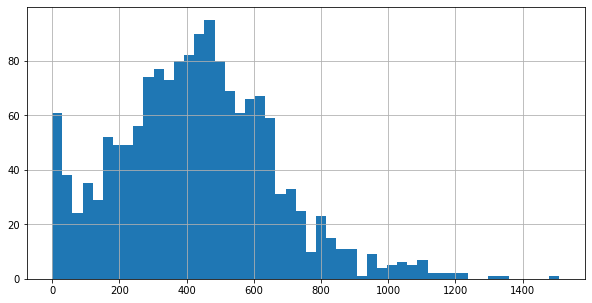

The distribution is skewed to the right
---------------------------------------
Statistics on: minutes
count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: minutes, dtype: float64
---------------------------------------
min border: -184.0
max border: 1032.0
---------------------------------------
The outliers are considered to be values above 1032.0
We have 28 values that we can consider outliers


In [47]:
# Defining function for checking distribution and outliers for Surf plan
def distribution_IQR(parameter):
    print(f'The histogram of: {parameter}')
    data_surf[parameter].hist(bins=50, figsize=(10, 5))
    plt.show()
    if data_surf[parameter].mean()>data_surf[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print(f'Statistics on: {parameter}')
    print(data_surf[parameter].describe())
    Q1 = data_surf[parameter].quantile(0.25)
    Q3 = data_surf[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:', min_iqr)
    print('max border:', max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print(f'The outliers are considered to be values above', max_iqr)
        print(f'We have {len(data_surf[data_surf[parameter]>max_iqr])} values that we can consider outliers')
    else:
        print(f'The outliers are considered to be values below {min_iqr} and above {max_iqr}')
        print(f'We have {len(data_surf[(data_surf[parameter]<min_iqr)|(data_surf[parameter]>max_iqr)])}'
              f' values that we can consider outliers')

# Calling function
distribution_IQR('minutes')

In [48]:
# Treating outliers
data_surf_filtered = data_surf.query('minutes <= 1032')

The histogram of: sms


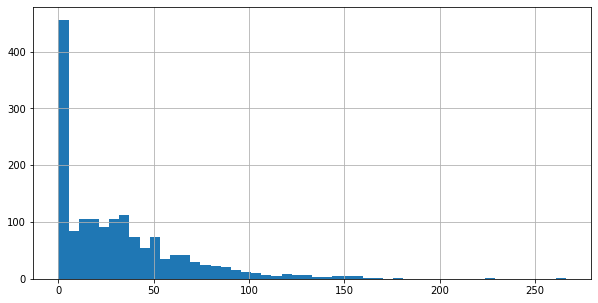

The distribution is skewed to the right
---------------------------------------
Statistics on: sms
count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: sms, dtype: float64
---------------------------------------
min border: -63.0
max border: 113.0
---------------------------------------
The outliers are considered to be values above 113.0
We have 51 values that we can consider outliers


In [49]:
# Checking for outliers in messages
distribution_IQR('sms')

In [50]:
# Treating outliers
data_surf_filtered = data_surf_filtered.query('sms <= 113')

The histogram of: web


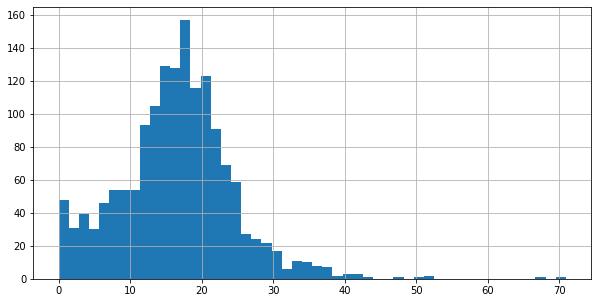

The distribution is skewed to the left
---------------------------------------
Statistics on: web
count    1573.000000
mean       16.558283
std         8.013513
min         0.000000
25%        11.986520
50%        16.829310
75%        20.999610
max        70.931590
Name: web, dtype: float64
---------------------------------------
min border: -1.533115000000004
max border: 34.51924500000001
---------------------------------------
The outliers are considered to be values above 34.51924500000001
We have 35 values that we can consider outliers


In [51]:
# Checking for outliers in Internet traffic
distribution_IQR('web')

In [52]:
# Treating outliers
data_surf_filtered = data_surf_filtered.query('web <= 34.519245')

In [53]:
# Checking dataframe parameters and the amount of dropped data
print(data_surf_filtered.describe())
print(f'Amount of dropped data: {(len(data_surf) - len(data_surf_filtered))/len(data_surf):.2%}')

           user_id        month      minutes          sms          web  \
count  1475.000000  1475.000000  1475.000000  1475.000000  1475.000000   
mean   1240.349831     9.141695   409.452203    27.041356    15.977084   
std     140.019042     2.479138   212.931486    26.609984     6.973709   
min    1001.000000     1.000000     0.000000     0.000000     0.000000   
25%    1117.000000     8.000000   258.500000     2.000000    11.920495   
50%    1241.000000    10.000000   413.000000    22.000000    16.671630   
75%    1358.000000    11.000000   560.000000    42.000000    20.579395   
max    1499.000000    12.000000  1029.000000   112.000000    34.474370   

               age   two_states  minutes_rev      sms_rev      web_rev  \
count  1475.000000  1475.000000  1475.000000  1475.000000  1475.000000   
mean     44.508475     0.256271     1.440325     0.120875    33.557153   
std      16.550581     0.436721     2.826594     0.326192    42.559750   
min      18.000000     0.000000     0

**We lost 6.23% of data**

#### Ultimate plan

The histogram of: minutes


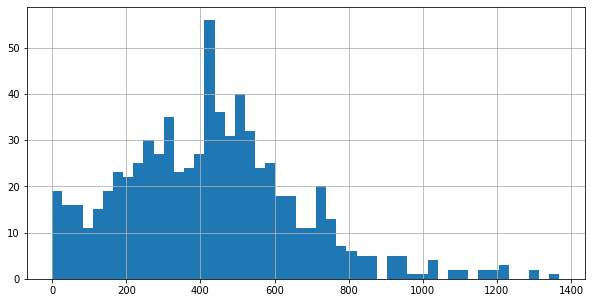

The distribution is skewed to the right
---------------------------------------
Statistics on: minutes
count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: minutes, dtype: float64
---------------------------------------
min border: -197.875
max border: 1023.125
---------------------------------------
The outliers are considered to be values above 1023.125
We have 16 values that we can consider outliers


In [54]:
# Defining function for checking distribution and outliers for Ultimate plan
def distribution_IQR_u(parameter):
    print(f'The histogram of: {parameter}')
    data_ultimate[parameter].hist(bins=50, figsize=(10, 5))
    plt.show()
    if data_ultimate[parameter].mean()>data_ultimate[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print(f'Statistics on: {parameter}')
    print(data_ultimate[parameter].describe())
    Q1 = data_ultimate[parameter].quantile(0.25)
    Q3 = data_ultimate[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:', min_iqr)
    print('max border:', max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print(f'The outliers are considered to be values above', max_iqr)
        print(f'We have {len(data_ultimate[data_ultimate[parameter]>max_iqr])} values that we can consider outliers')
    else:
        print(f'The outliers are considered to be values below {min_iqr} and above {max_iqr}')
        print(f'We have {len(data_ultimate[(data_ultimate[parameter]<min_iqr)|(data_ultimate[parameter]>max_iqr)])}'
              f' values that we can consider outliers')

# Checking for outliers in minutes              
distribution_IQR_u('minutes')

In [55]:
# Treating the outliers
data_ultimate_filtered = data_ultimate.query('minutes <= 1023.125')

The histogram of: sms


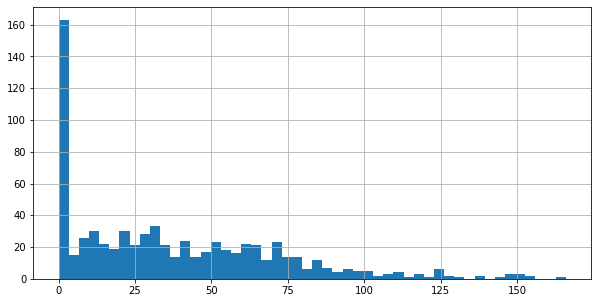

The distribution is skewed to the right
---------------------------------------
Statistics on: sms
count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: sms, dtype: float64
---------------------------------------
min border: -74.0
max border: 142.0
---------------------------------------
The outliers are considered to be values above 142.0
We have 10 values that we can consider outliers


In [56]:
# Checking dictribution in messages
distribution_IQR_u('sms')

In [57]:
# Treating outliers
data_ultimate_filtered = data_ultimate_filtered.query('sms <= 142')

The histogram of: web


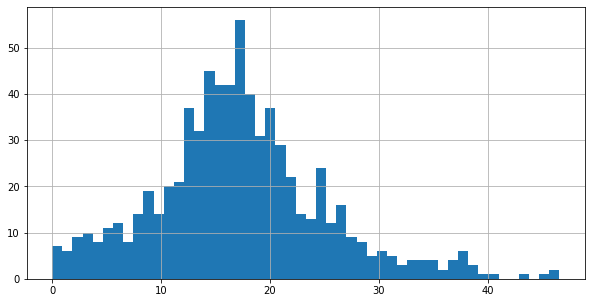

The distribution is skewed to the right
---------------------------------------
Statistics on: web
count    720.000000
mean      17.214700
std        7.851897
min        0.000000
25%       12.666955
50%       16.858340
75%       21.014527
max       46.595330
Name: web, dtype: float64
---------------------------------------
min border: 0.14559625000000054
max border: 33.53588624999999
---------------------------------------
The outliers are considered to be values below 0.14559625000000054 and above 33.53588624999999
We have 30 values that we can consider outliers


In [58]:
# Checking for outliers in internet traffic
distribution_IQR_u('web')

In [59]:
# Treating outliers
data_ultimate_filtered = data_ultimate_filtered.query('0.14559625 < web <= 33.53588625')

In [60]:
# Checking dataframe parameters and the amount of dropped data
print(data_ultimate_filtered.describe())
print(f'Amount of dropped data: {(len(data_ultimate) - len(data_ultimate_filtered))/len(data_ultimate):.2%}')

           user_id       month      minutes         sms         web  \
count   665.000000  665.000000   665.000000  665.000000  665.000000   
mean   1255.536842    9.123308   414.548872   33.553383   16.179206   
std     149.470568    2.578260   209.603889   30.537513    6.639729   
min    1000.000000    1.000000     0.000000    0.000000    0.233170   
25%    1128.000000    7.000000   262.000000    5.000000   12.440390   
50%    1246.000000   10.000000   420.000000   28.000000   16.410250   
75%    1401.000000   11.000000   544.000000   55.000000   20.157010   
max    1497.000000   12.000000  1020.000000  139.000000   33.370530   

              age  two_states  minutes_rev  sms_rev     web_rev   month_rev  
count  665.000000  665.000000        665.0    665.0  665.000000  665.000000  
mean    47.681203    0.123308          0.0      0.0    0.235368   70.235368  
std     16.968895    0.329038          0.0      0.0    1.955691    1.955691  
min     18.000000    0.000000          0.0      

**We lost 7.64% of data**

## Studying user behaviour

### Calls

In [61]:
# Calculating the mean and the variance of the monthly call duration
print('Surf plan)')
print(data_surf_filtered['minutes'].describe())
print()
print('Ultimate plan')
print(data_ultimate_filtered['minutes'].describe())

Surf plan)
count    1475.000000
mean      409.452203
std       212.931486
min         0.000000
25%       258.500000
50%       413.000000
75%       560.000000
max      1029.000000
Name: minutes, dtype: float64

Ultimate plan
count     665.000000
mean      414.548872
std       209.603889
min         0.000000
25%       262.000000
50%       420.000000
75%       544.000000
max      1020.000000
Name: minutes, dtype: float64


In [62]:
# Calculating the mean and the variance of the monthly call duration
data_minutes_stat_s = data_surf_filtered.pivot_table(
                                                    index= 'plan', 
                                                    values= 'minutes', 
                                                    aggfunc= ['mean', 'var','std', 'median'])
data_minutes_stat_u = data_ultimate_filtered.pivot_table(
                                                        index= 'plan', 
                                                        values= 'minutes', 
                                                        aggfunc= ['mean', 'var','std', 'median'])
print(f'Statisctics for Surf plan:')
display(data_minutes_stat_s)
print()
print(f'Statisctics for Ultimate plan:')
display(data_minutes_stat_u)

Statisctics for Surf plan:


,mean,var,std,median
,minutes,minutes,minutes,minutes
plan,,,,
surf,409.452203,45339.817761,212.931486,413



Statisctics for Ultimate plan:


,mean,var,std,median
,minutes,minutes,minutes,minutes
plan,,,,
ultimate,414.548872,43933.790153,209.603889,420


The mean and the variance for monthly call duration for both plans are very close: mean = 409.45 (Surf) / 414.55 (Ultimate) and variance = 45339.8 (Surf) / 43933.8.60 (Ultimate).

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: minutes, dtype: float64


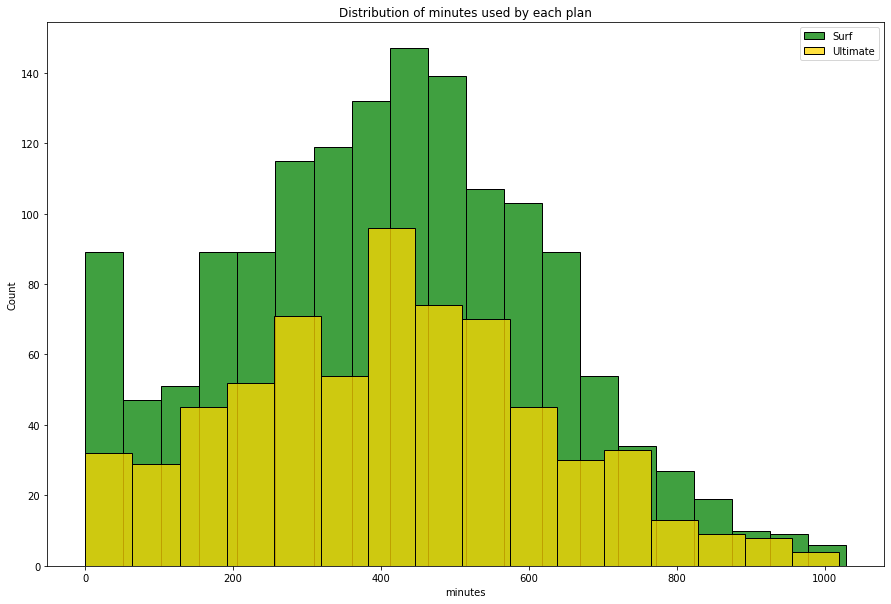

In [63]:
# Comparing the number of minutes users of each plan require each month.
print(data_surf['minutes'].describe())

fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(
            data=data_surf_filtered['minutes'], 
            label='Surf', 
            color='green')
sns.histplot(
            data=data_ultimate_filtered['minutes'], 
            label='Ultimate', 
            color='gold').set(title='Distribution of minutes used by each plan')
plt.legend()
plt.show()

Histogram shows that regarding monthly call duartion the behavior of the customers of both plans is pretty mach the same - the only clear seen diference is that Surf plan customers has more than two times higher amount of around 0 calls (the customers used their phones preferably for messaging and web surfing).  

Statistics for Surf plan
count    1475.000000
mean      409.452203
std       212.931486
min         0.000000
25%       258.500000
50%       413.000000
75%       560.000000
max      1029.000000
Name: minutes, dtype: float64

Statistics for Ultimate plan
count     665.000000
mean      414.548872
std       209.603889
min         0.000000
25%       262.000000
50%       420.000000
75%       544.000000
max      1020.000000
Name: minutes, dtype: float64


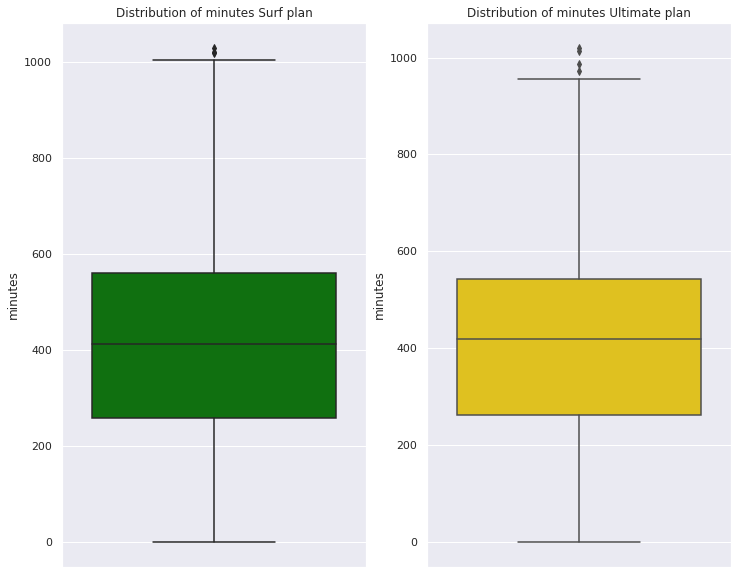

In [64]:
# Ploting a boxplot to visualize the distribution of the monthly call duration
sns.set(rc={"figure.figsize":(12 , 10 )})
fig, axes = plt.subplots(1, 2)
sns.boxplot(
            y = data_surf_filtered['minutes'], 
            color='green', 
            orient='v', 
            ax=axes[0]).set(title='Distribution of minutes Surf plan')
sns.boxplot(
            y = data_ultimate_filtered['minutes'], 
            color='gold', 
            orient='v', 
            ax=axes[1]).set(title='Distribution of minutes Ultimate plan')
print('Statistics for Surf plan')
print(data_surf_filtered['minutes'].describe())
print()
print('Statistics for Ultimate plan')
print(data_ultimate_filtered['minutes'].describe())

The boxplots visually confirm our previuous conclusions: the mean and the distribution of the monthly call duration in both plans are almost the same.

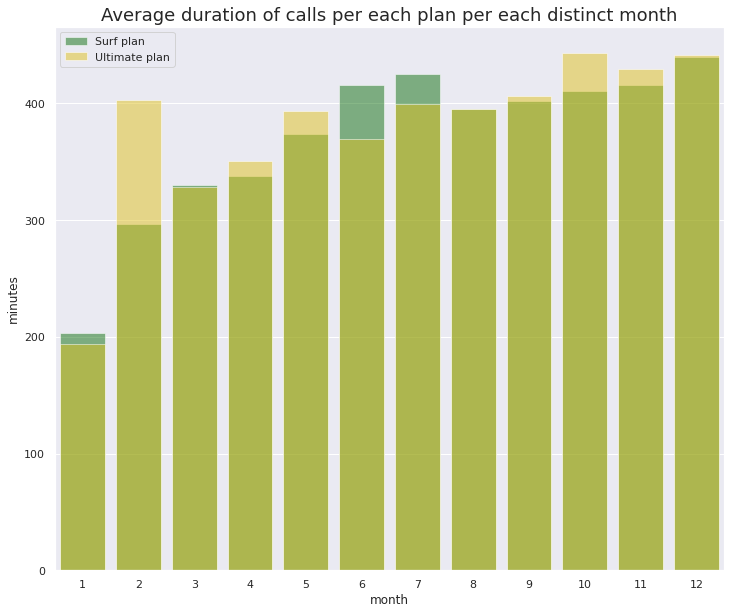

In [65]:
# Comparing average duration of calls per each plan per each distinct month. 
minutes_per_month_s = data_surf_filtered.pivot_table(index='month', values='minutes', fill_value=0).reset_index()
minutes_per_month_u = data_ultimate_filtered.pivot_table(index='month', values='minutes', fill_value=0).reset_index()

# Plotting the bar chart
sns.set(rc={"figure.figsize":(12 , 10 )})
sns.barplot(
            data=minutes_per_month_s, 
            x='month', 
            y='minutes', 
            label='Surf plan', 
            color='green', 
            alpha=0.5)
sns.barplot(
            data=minutes_per_month_u, 
            x='month', 
            y='minutes', 
            label='Ultimate plan', 
            color='gold', 
            alpha=0.5)
plt.legend()
plt.title('Average duration of calls per each plan per each distinct month', fontsize=18 )
plt.show()

Only february shows the clearly seen difference in customers behavior: Ultimate plan customers average call duration exceeded that for the Surf plan more than 100 minutes (~34%). On all other months the mean values are about the same. 

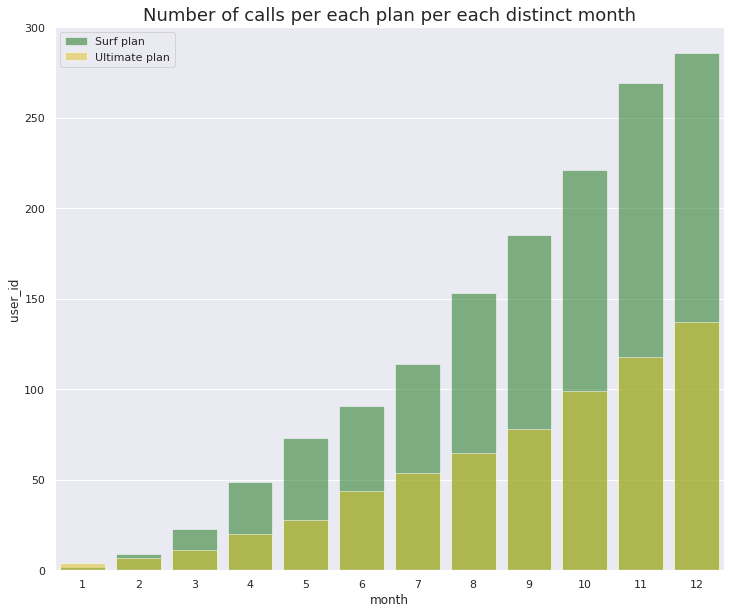

In [66]:
# Comparing average number of calls per each plan per each distinct month. 
minutes_per_month_s = data_surf_filtered.pivot_table(index='month', values='user_id', aggfunc='count',  fill_value=0).reset_index()
minutes_per_month_u = data_ultimate_filtered.pivot_table(index='month', values='user_id', aggfunc='count', fill_value=0).reset_index()

# Plotting the bar chart
sns.set(rc={"figure.figsize":(12 , 10 )})
sns.barplot(
            data=minutes_per_month_s, 
            x='month', 
            y='user_id', 
            label='Surf plan', 
            color='green', 
            alpha=0.5)
sns.barplot(
            data=minutes_per_month_u, 
            x='month', 
            y='user_id', 
            label='Ultimate plan', 
            color='gold', 
            alpha=0.5)
plt.legend()
plt.title('Number of calls per each plan per each distinct month', fontsize=18 )
plt.show()

Number of calls for both plans has been encreasing each month practically in the same proportion.

### Messages

In [67]:
# Calculating the mean and the variance of the messages
data_minutes_stat_s = data_surf_filtered.pivot_table(index= 'plan', values= 'sms', aggfunc= ['mean', 'var','std', 'median'])
data_minutes_stat_u = data_ultimate_filtered.pivot_table(index= 'plan', values= 'sms', aggfunc= ['mean', 'var','std', 'median'])
print(f'Statisctics for Surf plan:')
display(data_minutes_stat_s)
print()
print(f'Statisctics for Ultimate plan:')
display(data_minutes_stat_u)

Statisctics for Surf plan:


,mean,var,std,median
,sms,sms,sms,sms
plan,,,,
surf,27.041356,708.091233,26.609984,22



Statisctics for Ultimate plan:


,mean,var,std,median
,sms,sms,sms,sms
plan,,,,
ultimate,33.553383,932.539691,30.537513,28


Statistics for messages for Ultimate plan is higher, than for Surf one: mean 27 (Surf) / 34 (Ultimate) and variance 708.1 (Surf) / 932.5 (Ultimate).

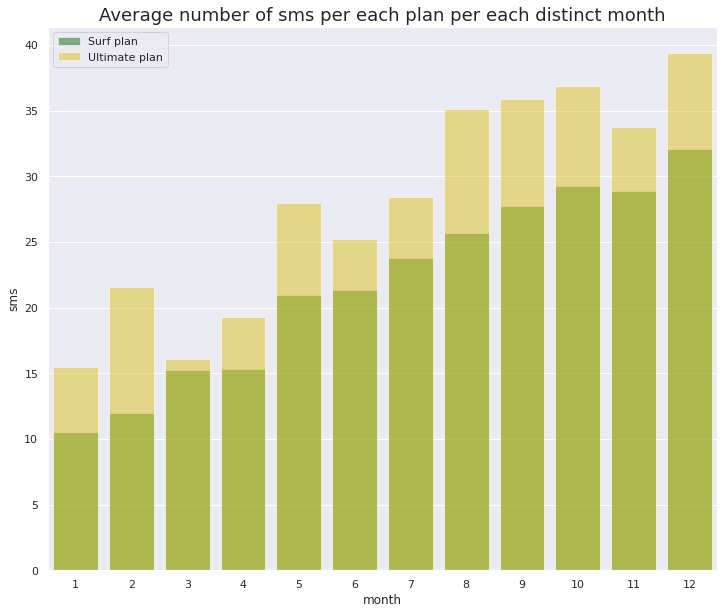

count    1475.000000
mean       27.041356
std        26.609984
min         0.000000
25%         2.000000
50%        22.000000
75%        42.000000
max       112.000000
Name: sms, dtype: float64

count    665.000000
mean      33.553383
std       30.537513
min        0.000000
25%        5.000000
50%       28.000000
75%       55.000000
max      139.000000
Name: sms, dtype: float64


In [68]:
# Comparing the number of messages users of each plan tend to send each month
minutes_per_month_s = data_surf_filtered.pivot_table(index='month', values='sms', fill_value=0).reset_index()
minutes_per_month_u = data_ultimate_filtered.pivot_table(index='month', values='sms', fill_value=0).reset_index()

# Plotting the bar chart
sns.set(rc={"figure.figsize":(12 , 10 )})
sns.barplot(
            data=minutes_per_month_s, 
            x='month', 
            y='sms', 
            label='Surf plan', 
            color='green', 
            alpha=0.5)
sns.barplot(
            data=minutes_per_month_u, 
            x='month', 
            y='sms', 
            label='Ultimate plan', 
            color='gold', 
            alpha=0.5)
plt.legend()
plt.title('Average number of sms per each plan per each distinct month', fontsize=18 )
plt.show()
print(data_surf_filtered['sms'].describe())
print()
print(data_ultimate_filtered['sms'].describe())

In every particular month customers of Ultimate plan has been sending from 10% to 45% more messages than Surf plan customers.

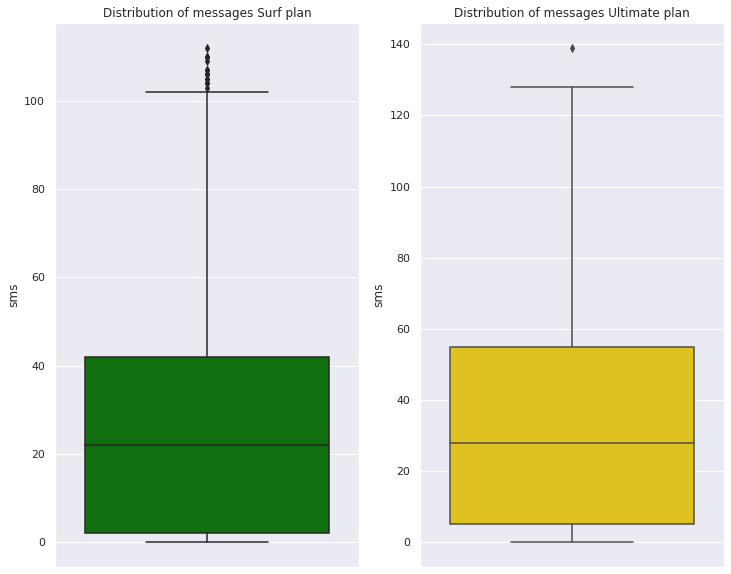

In [69]:
# Building boxplots for visualization of messages distribution
sns.set(rc={"figure.figsize":(12 , 10 )})
fig, axes = plt.subplots(1, 2)
sns.boxplot(
            y = data_surf_filtered['sms'], 
            color='green', 
            orient='v', 
            ax=axes[0]).set(title='Distribution of messages Surf plan')
sns.boxplot(
            y = data_ultimate_filtered['sms'], 
            color='gold', 
            orient='v', 
            ax=axes[1]).set(title='Distribution of messages Ultimate plan')
plt.show()

Boxplots visually confirms the previous conclusions and statistics: mean for Ultimate plan is higher, then for Surf one: 33.55 / 27.04, std is 30.53 (Ultimate) / 26.60 (Surf).

Customers of Ultimate plan tend to send an average of 24% more messages than Surf plan customers. 

### Internet

In [70]:
# Calculating the mean and the variance of the web sessions
data_minutes_stat_s = data_surf_filtered.pivot_table(index= 'plan', values= 'web', aggfunc= ['mean', 'var','std', 'median'])
data_minutes_stat_u = data_ultimate_filtered.pivot_table(index= 'plan', values= 'web', aggfunc= ['mean', 'var','std', 'median'])
print(f'Statisctics for Surf plan:')
display(data_minutes_stat_s)
print()
print(f'Statisctics for Ultimate plan:')
display(data_minutes_stat_u)

Statisctics for Surf plan:


,mean,var,std,median
,web,web,web,web
plan,,,,
surf,15.977084,48.632619,6.973709,16.67163



Statisctics for Ultimate plan:


,mean,var,std,median
,web,web,web,web
plan,,,,
ultimate,16.179206,44.085995,6.639729,16.41025


The means of web sessions for both plans are very close: mean = 15.98 (Surf) / 16.18 (Ultimate) while variance for Surf is a bit higher 48.6 (Surf) / 44.1 (Ultimate).

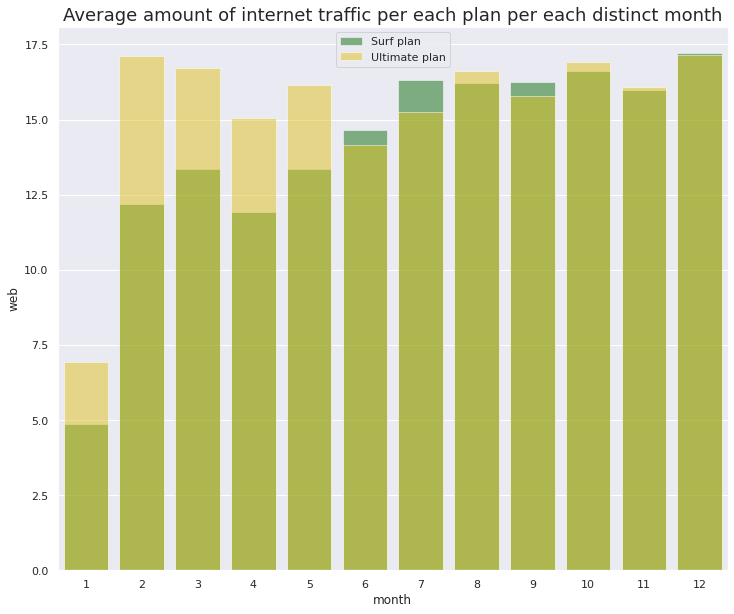

Surf plan
count    1475.000000
mean       15.977084
std         6.973709
min         0.000000
25%        11.920495
50%        16.671630
75%        20.579395
max        34.474370
Name: web, dtype: float64

Ultimate plan
count    665.000000
mean      16.179206
std        6.639729
min        0.233170
25%       12.440390
50%       16.410250
75%       20.157010
max       33.370530
Name: web, dtype: float64


In [71]:
# Comparing the amount of internet traffic consumed by users per plan
minutes_per_month_s = data_surf_filtered.pivot_table(index='month', values='web', fill_value=0).reset_index()
minutes_per_month_u = data_ultimate_filtered.pivot_table(index='month', values='web', fill_value=0).reset_index()

# Building the boxplots
sns.set(rc={"figure.figsize":(12 , 10 )})
sns.barplot(
            data=minutes_per_month_s, 
            x='month', 
            y='web', 
            label='Surf plan', 
            color='green', 
            alpha=0.5)
sns.barplot(
            data=minutes_per_month_u, 
            x='month', 
            y='web', 
            label='Ultimate plan', 
            color='gold', 
            alpha=0.5)
plt.legend()
plt.title('Average amount of internet traffic per each plan per each distinct month', fontsize=18 )
plt.show()
print('Surf plan')
print(data_surf_filtered['web'].describe())
print()
print('Ultimate plan')
print(data_ultimate_filtered['web'].describe())

The mean and the variance for Internet traffic consumed for both plans shows that Ultimate plan customers on average consume a little bit more internet traffic (about 1.7%), than Surf one: mean = 15.98 (Surf) / 16.18 (Ultimate) and std = 6.97 (Surf) / 6.64 (Ultimate).

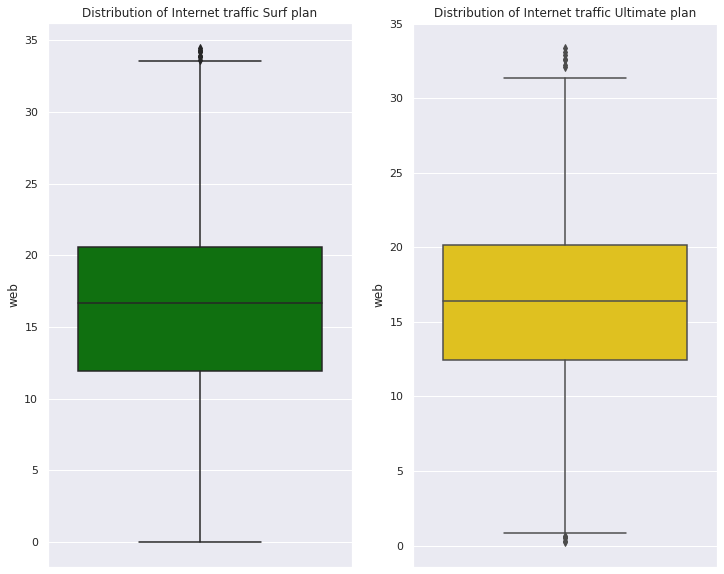

In [72]:
# Building boxplots
sns.set(rc={"figure.figsize":(12 , 10 )})
fig, axes = plt.subplots(1, 2)
sns.boxplot(
            y = data_surf_filtered['web'], 
            color='green', 
            orient='v', 
            ax=axes[0]).set(title='Distribution of Internet traffic Surf plan')
sns.boxplot(
            y = data_ultimate_filtered['web'], 
            color='gold', 
            orient='v', 
            ax=axes[1]).set(title='Distribution of Internet traffic Ultimate plan')
plt.show()

The boxplots confirm that internet traffic consumption for both plans is practically the same.

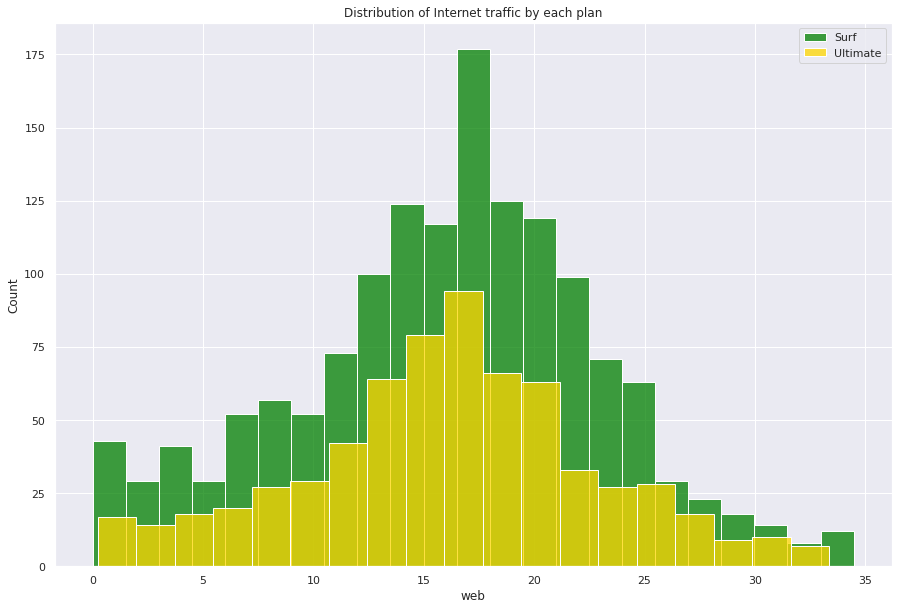

In [73]:
# Comparing the Internet traffic users of each plan consume each month.
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(
            data=data_surf_filtered['web'], 
            label='Surf', 
            color='green')
sns.histplot(
            data=data_ultimate_filtered['web'], 
            label='Ultimate', 
            color='gold').set(title='Distribution of Internet traffic by each plan')
plt.legend()
plt.show()

Statistics and visualization both shows us, that users in both plans consume the Internet traffic in the same way - the mean for Surf plan (15.97) is pretty close to the mean for Ultimate (16.18) while the median are even closer 16.67 vs 16.41 for the plans respectively.

## Revenue

Surf plan
count    1475.000000
mean       55.118353
std        43.103148
min        20.000000
25%        20.000000
50%        37.450000
75%        76.745000
max       221.970000
Name: month_rev, dtype: float64

Ultimate plan
count    665.000000
mean      70.235368
std        1.955691
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max       92.960000
Name: month_rev, dtype: float64


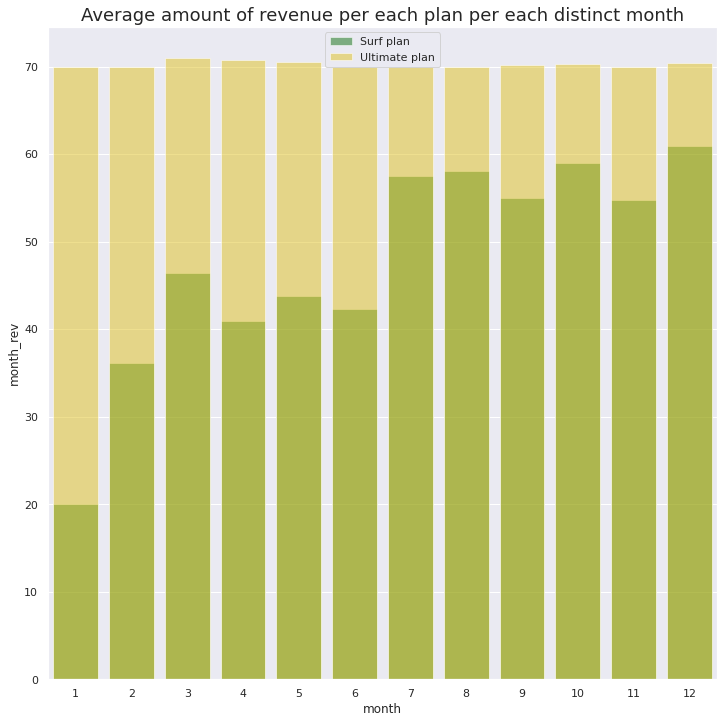

In [74]:
# Comparing the average revenue for users of each plan per each month
revenue_per_month_s = data_surf_filtered.pivot_table(index='month', values='month_rev', fill_value=0).reset_index()
revenue_per_month_u = data_ultimate_filtered.pivot_table(index='month', values='month_rev', fill_value=0).reset_index()

# Buildint the bar chart
sns.set(rc={"figure.figsize":(12 , 12 )})
sns.barplot(
            data=revenue_per_month_s, 
            x='month', 
            y='month_rev', 
            label='Surf plan', 
            color='green', 
            alpha=0.5)
sns.barplot(
            data=revenue_per_month_u, 
            x='month', 
            y='month_rev', 
            label='Ultimate plan', 
            color='gold', 
            alpha=0.5)
plt.legend()
ylim=100
plt.title('Average amount of revenue per each plan per each distinct month', fontsize=18 )
print('Surf plan')
print(data_surf_filtered['month_rev'].describe())
print()
print('Ultimate plan')
print(data_ultimate_filtered['month_rev'].describe())

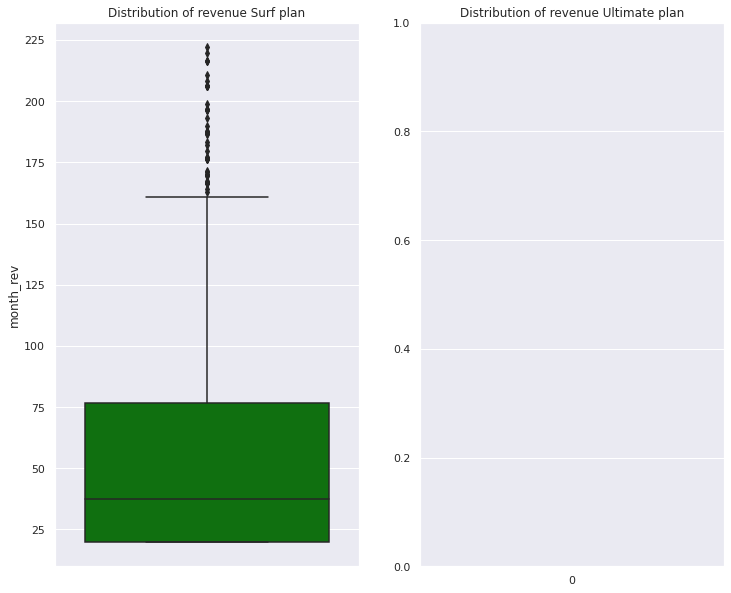

count    1475.000000
mean       55.118353
std        43.103148
min        20.000000
25%        20.000000
50%        37.450000
75%        76.745000
max       221.970000
Name: month_rev, dtype: float64

count    665.000000
mean      70.235368
std        1.955691
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max       92.960000
Name: month_rev, dtype: float64


In [75]:
# Building the boxplot of revenue
sns.set(rc={"figure.figsize":(12 , 10 )})
fig, axes = plt.subplots(1, 2)
sns.boxplot(
            y = data_surf_filtered['month_rev'], 
            color='green', 
            orient='v', 
            ax=axes[0]).set(title='Distribution of revenue Surf plan')
sns.boxplot(
            у = data_ultimate_filtered['month_rev'], 
            color='gold', 
            orient='v', 
            ax=axes[1]).set(title='Distribution of revenue Ultimate plan')
plt.show()
print(data_surf_filtered['month_rev'].describe())
print()
print(data_ultimate_filtered['month_rev'].describe())

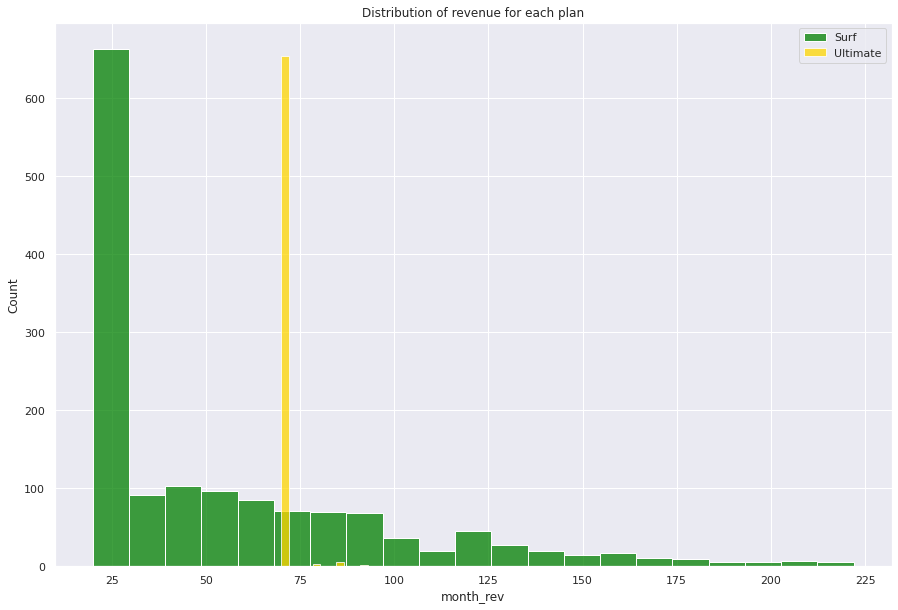

In [76]:
# Creating the histogram of revenue for both plans
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(
            data=data_surf_filtered['month_rev'], 
            label='Surf', 
            color='green')
sns.histplot(
            data=data_ultimate_filtered['month_rev'], 
            label='Ultimate', 
            color='gold').set(title='Distribution of revenue for each plan')
plt.legend()
plt.show()

The distribution of revenue from Surf plan is totally different from Ultimate one: the majority of Ultimate plan customers pay either plan cost (70) or a little bit higher monthly price, while Surf plan customers payments vary from plan cost (20) up to 3.8 times higher price. The mean value (70.24) for Ultimate is almost the plan cost, while for Surf plan mean (55.12) is 2.75 times higher than the plan cost.  

## Testing  statistical hypotheses

### Hypothesys about average revenue of Sur and Ultimate plans

We can now test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs. Foк this purpose we need to define null and alternative hypothesis.  
**Null hypothesis** is that average revenue from Surf and Ultimane plans is the same.  
**Alternative hypothesis** is that the average revenue from Ultimate plan is higher then from Surf one.  
  
For testing hypothesis we will use Student test to compare the average revenues from both plans. We will set the aplpha value to 0.05 first and then will check if such difference is good enoughe to make the conclusion on null and alternative hypothesis.


In [77]:
# Testing null hypotheses
alpha=0.05
results = st.ttest_ind(data_surf_filtered['month_rev'], data_ultimate_filtered['month_rev'], equal_var=False)
print(f'p-value: {results.pvalue:.10%}')

if results.pvalue < alpha:
    print('We reject the null hypthesis: Revenue from Surf and Ultimate plans differ from each other.')
else:
    prine('We cannot reject the null hypthesis')

# Testing alternative hypotheses
alpha=0.05
results = st.ttest_ind(data_surf_filtered['month_rev'], data_ultimate_filtered['month_rev'], 
                       equal_var=False, alternative = 'greater')
print(f'p-value: {results.pvalue:.10%}')

if results.pvalue < alpha:
    print('We reject the alternative hypthesis. Revenue from Surf plan supposed to be lager, than from Ultimate one.')
else:
    print('We cannot reject the alternative hypthesis. Revenue from Surf plan supposed to be less, '
          'than from Ultimate one.')   
    

p-value: 0.0000000000%
We reject the null hypthesis: Revenue from Surf and Ultimate plans differ from each other.
p-value: 100.0000000000%
We cannot reject the alternative hypthesis. Revenue from Surf plan supposed to be less, than from Ultimate one.


While testing by statistical method (Student test) we rejected the hypothesis, stating that revenue from Surf and Ultimate plans is the same and made the conclusion, that Ultimate plan revenue supposed to be larger, than from Surf plan.

### Hypothesis about average revenue from NY-NJ region vs average revenue from other regions.

Now we can test the hypothesis that the average revenue from users in the NY-NJ region is different from that of the users from the other regions.

**Null hypothesis** is that average revenue from NY-NJ region and from other areas is the same.  
**Alternative hypothesis** is that the average revenue from from NY-NJ area is higher then from from other areas.  
  
For testing hypothesis we will use Student test to compare the average revenues from both regions. We will set the aplpha value to 0.05 first and then will check if such difference is good enoughe to make the conclusion on null and alternative hypothesis.

In [78]:
# Slicing dataframes for NY-NJ region and other areas for each plan.
data_NYNJ_s = data_surf_filtered.query('two_states == 1')  # NY-NJ for Surf
data_non_NYNJ_s = data_surf_filtered.query('two_states == 0') # non NY-NJ for Surf
data_NYNJ_u = data_ultimate_filtered.query('two_states == 1') # NY-NJ for Ultimate
data_non_NYNJ_u = data_ultimate_filtered.query('two_states == 0') # non NY-NJ for Ultimate

# Checking distributions in the dataframes
print(f'NY-NJ Surf plan: ', data_NYNJ_s['month_rev'].describe())
print()
print(f'non-NY-NJ Surf plan: ', data_non_NYNJ_s['month_rev'].describe())
print()
print(f'NY-NJ Ultimate plan: ', data_NYNJ_u['month_rev'].describe())
print()
print(f'non-NY-NJ Ultimate plan: ', data_non_NYNJ_u['month_rev'].describe())

NY-NJ Surf plan:  count    378.000000
mean      54.359418
std       45.009731
min       20.000000
25%       20.000000
50%       36.400000
75%       76.752500
max      219.820000
Name: month_rev, dtype: float64

non-NY-NJ Surf plan:  count    1097.000000
mean       55.379863
std        42.444351
min        20.000000
25%        20.000000
50%        38.350000
75%        76.700000
max       221.970000
Name: month_rev, dtype: float64

NY-NJ Ultimate plan:  count    82.000000
mean     70.778537
std       3.629755
min      70.000000
25%      70.000000
50%      70.000000
75%      70.000000
max      92.960000
Name: month_rev, dtype: float64

non-NY-NJ Ultimate plan:  count    583.000000
mean      70.158971
std        1.575608
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max       92.960000
Name: month_rev, dtype: float64


#### Surf plan

In [79]:
# Testing null hypotheses for Surf plan
alpha=0.05
results = st.ttest_ind(data_NYNJ_s['month_rev'], data_non_NYNJ_s['month_rev'], equal_var=False)
print(f'p-value: {results.pvalue:.3%}')

if results.pvalue < alpha:
    print('We reject the null hypthesis: Revenue from NY-NJ region and other regions for Surf plan '
          'differ from each other.')
else:
    print('We cannot reject the null hypthesis')

# Testing alternative hypotheses
alpha=0.05
results = st.ttest_ind(data_NYNJ_s['month_rev'], data_non_NYNJ_s['month_rev'], equal_var=False, alternative = 'greater')
print(f'p-value: {results.pvalue:.3%}')

if results.pvalue < alpha:
    print('We reject the alternative hypthesis. Revenue from NY-NJ region for Surf plan supposed to be lager, '
          'than from other regions.')
else:
    print('We cannot reject the alternative hypthesis. Revenue for Surf plan from NY-NJ region supposed to be less, '
          'than from other regions. ')   
    

p-value: 69.989%
We cannot reject the null hypthesis
p-value: 65.005%
We cannot reject the alternative hypthesis. Revenue for Surf plan from NY-NJ region supposed to be less, than from other regions. 


While testing by statistical method (Student test) we cannot rejected the hypothesis, stating that revenue from NY-NJ customers of Surf plan is the same for the Surf plan customers from other regions.  We also cannot reject the hypothesis, that revenue for Surf plan from NY-NJ region supposed to be less, than from other regions.

#### Ultimate plan

In [80]:
# Testing null hypotheses for Ultimate plan
alpha=0.05
results = st.ttest_ind(data_NYNJ_u['month_rev'], data_non_NYNJ_u['month_rev'], equal_var=False)
print(f'p-value: {results.pvalue:.3%}')

if results.pvalue < alpha:
    print('We reject the null hypthesis: Revenue for Ultimate plan from NY-NJ region and other regions '
          'differ from each other.')
else:
    print('We cannot reject the null hypthesis')

# Testing alternative hypotheses for Ultimate plan
alpha=0.05
results = st.ttest_ind(data_NYNJ_u['month_rev'], data_non_NYNJ_u['month_rev'], equal_var=False, alternative = 'greater')
print(f'p-value: {results.pvalue:.3%}')

if results.pvalue < alpha:
    print('We reject the alternative hypthesis. Revenue for Ultimate one from NY-NJ region supposed to be lager,'
          'than for other regions.')
else:
    print('We cannot reject the alternative hypthesis. Revenue for Ultimate plan from NY-NJ region supposed to be'
          ' less, than from other regions. ')      

p-value: 13.081%
We cannot reject the null hypthesis
p-value: 6.541%
We cannot reject the alternative hypthesis. Revenue for Ultimate plan from NY-NJ region supposed to be less, than from other regions. 


While testing by statistical method (Student test) we cannot rejected the hypothesis, stating that revenue from NY-NJ customers of Ultimate plan is the same for the Ultimate plan customers from other regions.  We also cannot reject the hypothesis, that revenue for Ultimate plan from NY-NJ region supposed to be less, than from other regions.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

During this project we have studied and analized 5 datasets containing information for 500 users of 2 mobile plans (Surf and Ultimate) for 12 months of one calendar year. Dataframes were of different size (from 2 to 137735 rows) and contained data of high quality: no missing values, no duplicate entries. All columns (with one excepmtion - calls/message/session_date) contained values of the proper types.  
For the purpose of analysis we converted the text data of the date into datetime format and extracted month into separate column in each dataframe. From values in `city` column of `user_data` dataframe there were extracted state names and new column `two_states` for NY-NJ region was added.  
After fixing end enriching data in all dataframes we merged all information about calls, messages, Internet traffic, address and plan name of each customer into one new dataframe, which allowed us to calculate the revenue for each customer for each particular month.  
Before going further on for calculations with mean values we checked the distributions and treated outliers for each category (minutes, messages and Internet traffic) in each plan.  
Thus obtaining clean data we studied users behavior in each category (calls, messages, Internet traffic) and identified the following features:  
1. There was practically no difference between customers of two plans regarding average monthly calls duration - the mean and the deviation for both plans found out almost the same: mean = 409.45 (Surf) / 414.55 (Ultimate) and std = 212.93 (Surf) / 209.60 (Ultimate).  
2. The was a clear differense between customers of two plans regarding messaging - users of Ultimate plan tend to send an average of 24% more messages than Surf plan customers. Mean for Ultimate plan is higher, then for Surf one: 33.55 / 27.04, std is 30.53 (Ultimate) / 26.60 (Surf).  
3. Statistics and visualization both showed, that users in both plans consume the Internet traffic in the same way - the mean for Surf plan (15.97) is pretty close to the mean for Ultimate (16.18) while the median are even closer 16.67 vs 16.41 for the plans respectively.  

The distribution of revenue from Surf plan was found totally different from Ultimate one: the majority of Ultimate plan customers pay either plan cost (70) or a little bit higher monthly price, while Surf plan customers payments vary from plan cost (20) up to 3.8 times higher price. The mean value (70.24) for Ultimate is almost the plan cost, while for Surf plan mean (55.12) is 2.75 times higher than the plan cost.  

Customers of Ultimate plan buys much less additional services (minutes/sms/Gb) than Surf plan customers and vice versa Surf plan customers on average buy a lot of additional services. It means that Ultimate plan is designed to better suit the needs of its target group.  
  
Student test allowed us to reject the revenue equality hypothesis and establish that average revenue from Ultimate plan is higher, than from Surf plan.  
  
From the other hand we could not reject the hypothesis that average revenue from customers in NY-NJ area is differnet from that of the users from other regions for both plans.    

